In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
path = untar_data(URLs.CIFAR); path

PosixPath('/home/ec2-user/.fastai/data/cifar10')

In [4]:
path.ls()

[PosixPath('/home/ec2-user/.fastai/data/cifar10/test'),
 PosixPath('/home/ec2-user/.fastai/data/cifar10/labels.txt'),
 PosixPath('/home/ec2-user/.fastai/data/cifar10/train')]

In [5]:
path_anno = path/'labels.txt'
path_train = path/'train'
path_test = path/'test'

In [6]:
open(path_anno).readlines()

['airplane\n',
 'automobile\n',
 'bird\n',
 'cat\n',
 'deer\n',
 'dog\n',
 'frog\n',
 'horse\n',
 'ship\n',
 'truck\n']

In [7]:
path_train.ls()

[PosixPath('/home/ec2-user/.fastai/data/cifar10/train/ship'),
 PosixPath('/home/ec2-user/.fastai/data/cifar10/train/truck'),
 PosixPath('/home/ec2-user/.fastai/data/cifar10/train/frog'),
 PosixPath('/home/ec2-user/.fastai/data/cifar10/train/automobile'),
 PosixPath('/home/ec2-user/.fastai/data/cifar10/train/dog'),
 PosixPath('/home/ec2-user/.fastai/data/cifar10/train/horse'),
 PosixPath('/home/ec2-user/.fastai/data/cifar10/train/cat'),
 PosixPath('/home/ec2-user/.fastai/data/cifar10/train/deer'),
 PosixPath('/home/ec2-user/.fastai/data/cifar10/train/bird'),
 PosixPath('/home/ec2-user/.fastai/data/cifar10/train/airplane')]

In [8]:
path_train.ls()[0].ls()[:10]

[PosixPath('/home/ec2-user/.fastai/data/cifar10/train/ship/3625_ship.png'),
 PosixPath('/home/ec2-user/.fastai/data/cifar10/train/ship/2096_ship.png'),
 PosixPath('/home/ec2-user/.fastai/data/cifar10/train/ship/31489_ship.png'),
 PosixPath('/home/ec2-user/.fastai/data/cifar10/train/ship/28066_ship.png'),
 PosixPath('/home/ec2-user/.fastai/data/cifar10/train/ship/22649_ship.png'),
 PosixPath('/home/ec2-user/.fastai/data/cifar10/train/ship/1970_ship.png'),
 PosixPath('/home/ec2-user/.fastai/data/cifar10/train/ship/10354_ship.png'),
 PosixPath('/home/ec2-user/.fastai/data/cifar10/train/ship/5630_ship.png'),
 PosixPath('/home/ec2-user/.fastai/data/cifar10/train/ship/2577_ship.png'),
 PosixPath('/home/ec2-user/.fastai/data/cifar10/train/ship/35018_ship.png')]

In [27]:
data = (ImageList.from_folder(path).split_by_rand_pct(0.2)\
     .label_from_folder().transform(get_transforms())\
     .databunch()).normalize(imagenet_stats)

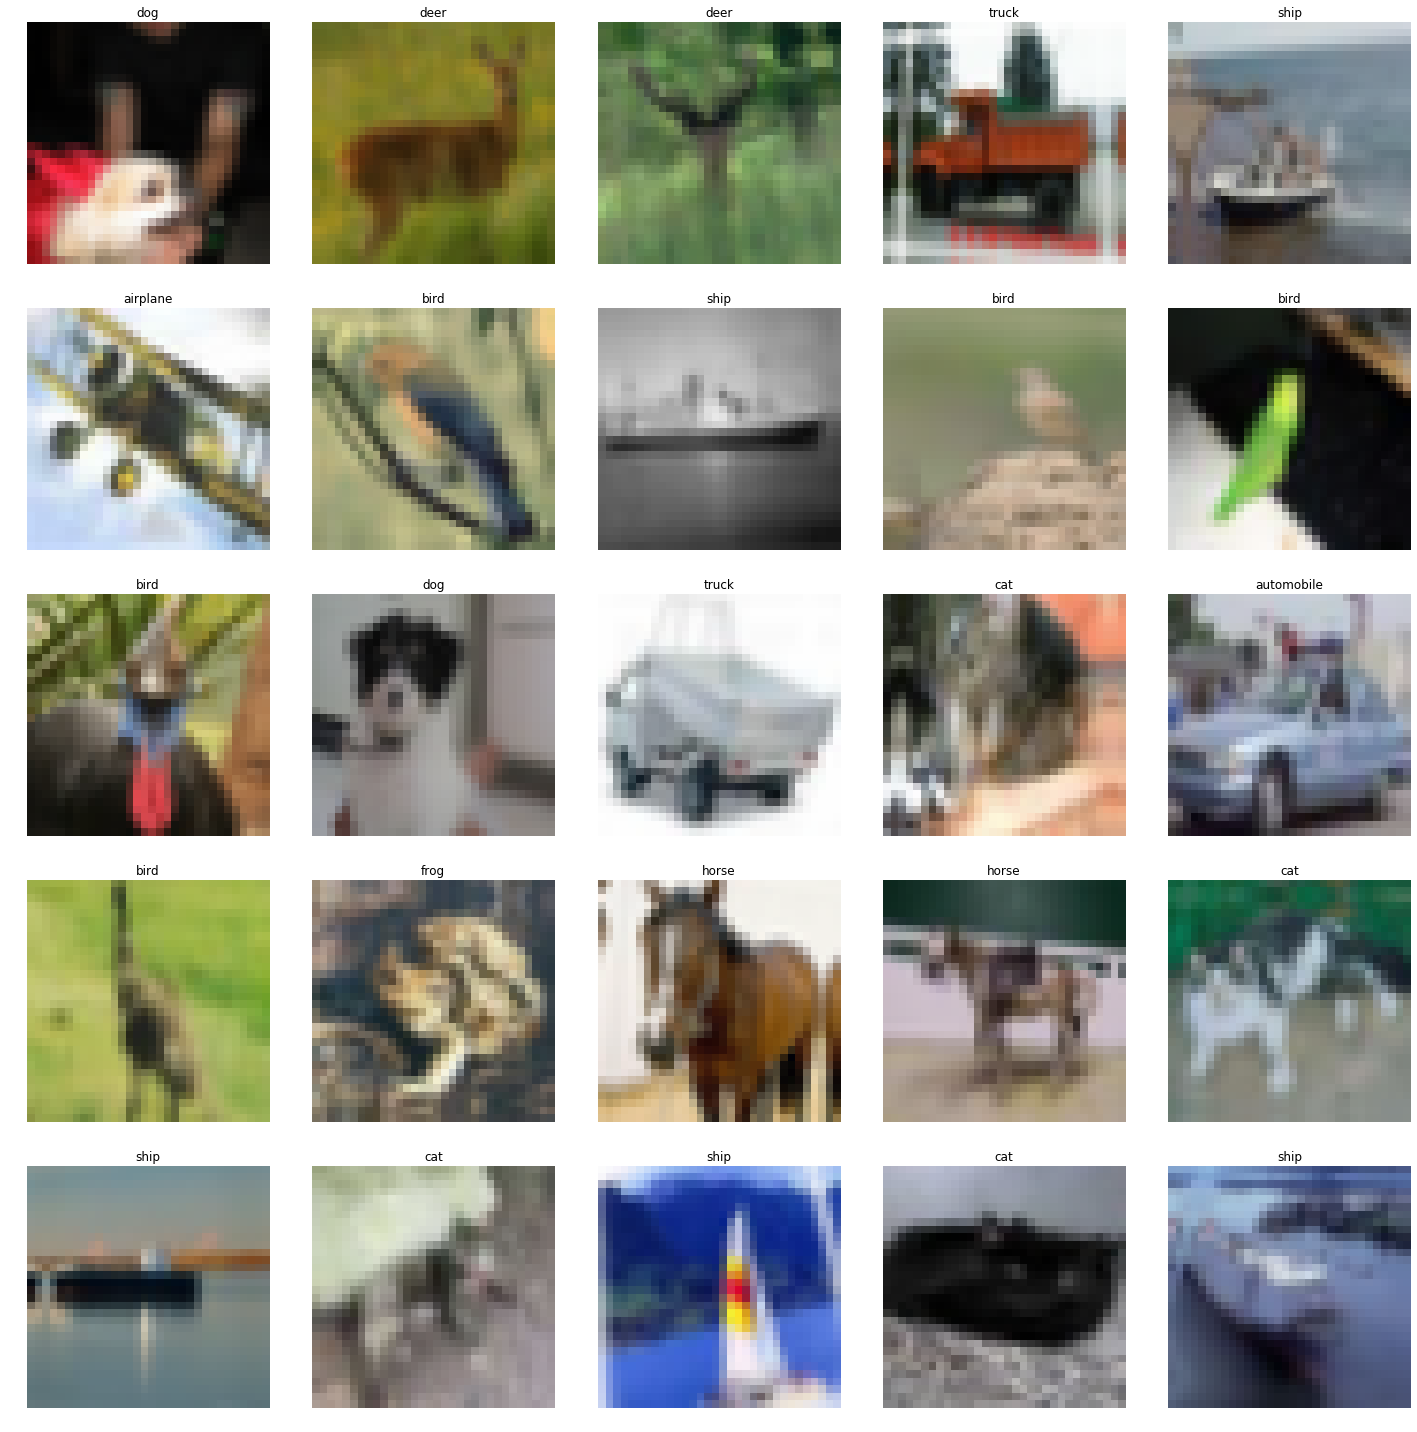

In [28]:
data.show_batch()

In [29]:
data.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [53]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/ec2-user/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [54]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.914414,1.520207,0.524083,01:19
1,1.478384,1.221925,0.425417,01:15
2,1.230924,1.015398,0.347833,01:15
3,1.036299,0.850893,0.301000,01:15
4,0.902880,0.769523,0.271917,01:15
5,0.829651,0.701591,0.247667,01:15
6,0.814884,0.675642,0.238250,01:15
7,0.756295,0.644674,0.229083,01:15
8,0.746597,0.635015,0.227250,01:15
9,0.720238,0.641272,0.227083,01:17


In [42]:
!wget https://images.unsplash.com/photo-1529074963764-98f45c47344b?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&w=1000&q=80

In [56]:
learn.predict(open_image('horse.png').resize((3,32,32)))

(Category horse,
 tensor(7),
 tensor([1.8056e-04, 3.7469e-05, 1.1803e-02, 4.9768e-03, 1.4599e-01, 2.7856e-02,
         2.6136e-03, 8.0642e-01, 2.2482e-05, 1.0463e-04]))

In [57]:
interp = ClassificationInterpretation.from_learner(learn)

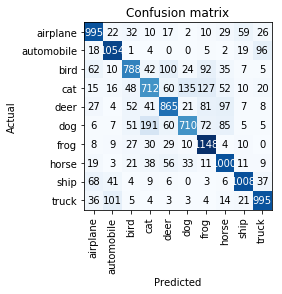

In [58]:
interp.plot_confusion_matrix()

,0
0,[ABT]
1,[BAC]
2,[Conquest]
3,[DS]
4,[Dacia]
5,[Fisker]
6,[GMC]
7,[Gumpert]
8,[Hennessey]
9,[Icona]


In [16]:
import os

In [20]:
sorted([int(i) for i in os.listdir('car_data/data/image')])

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163]